# Predict BMY Stock Market With Machine Learning

## Downloading S&P 500 price data

In [1]:
# yfinance package downloads daily stock prices from Yahoo
import yfinance as yf

In [2]:
# Downloads stock price history for a trading company, Bristol Myers Squibb (BMY)
sp500 = yf.Ticker("BMY")

In [3]:
# Prints historical BMY stock prices up to current date
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-06-01,0.000000,0.325719,0.322494,0.323784,3146956,0.0,0.0
1972-06-02,0.323784,0.328299,0.323784,0.327009,1136401,0.0,0.0
1972-06-05,0.327009,0.328944,0.326364,0.327654,480785,0.0,0.0
1972-06-06,0.327654,0.329589,0.325719,0.325719,1338129,0.0,0.0
1972-06-07,0.325719,0.327009,0.323784,0.325074,894327,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-31,61.349998,62.320000,61.110001,62.189999,11700600,0.0,0.0
2023-08-01,62.320000,62.570000,61.180000,61.529999,9227600,0.0,0.0
2023-08-02,61.169998,62.330002,61.020000,61.750000,11937800,0.0,0.0


In [5]:
# Datetime index; index and slice the dataframe
sp500.index

DatetimeIndex(['1972-06-01', '1972-06-02', '1972-06-05', '1972-06-06',
               '1972-06-07', '1972-06-08', '1972-06-09', '1972-06-12',
               '1972-06-13', '1972-06-14',
               ...
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-31', '2023-08-01', '2023-08-02',
               '2023-08-03', '2023-08-04'],
              dtype='datetime64[ns]', name='Date', length=12905, freq=None)

## Cleaning and visualizing stock market data

<AxesSubplot:xlabel='Date'>

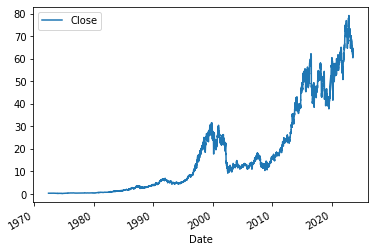

In [6]:
# Plotting closing price against index
sp500.plot.line(y="Close", use_index=True)

In [7]:
# Delete unnecessary columns - Dividends and Stock Splits
del sp500["Dividends"]
del sp500["Stock Splits"]

## Setting up target for machine learning

In [8]:
# Target to predict whether stock price will go up or down tomorrow; tomorrow's price; shift back by 1
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1972-06-01,0.000000,0.325719,0.322494,0.323784,3146956,0.327009
1972-06-02,0.323784,0.328299,0.323784,0.327009,1136401,0.327654
1972-06-05,0.327009,0.328944,0.326364,0.327654,480785,0.325719
1972-06-06,0.327654,0.329589,0.325719,0.325719,1338129,0.325074
1972-06-07,0.325719,0.327009,0.323784,0.325074,894327,0.327009
...,...,...,...,...,...,...
2023-07-31,61.349998,62.320000,61.110001,62.189999,11700600,61.529999
2023-08-01,62.320000,62.570000,61.180000,61.529999,9227600,61.750000
2023-08-02,61.169998,62.330002,61.020000,61.750000,11937800,61.230000


In [10]:
# Target to show if tomorrow's price is greater than today's price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1972-06-01,0.000000,0.325719,0.322494,0.323784,3146956,0.327009,1
1972-06-02,0.323784,0.328299,0.323784,0.327009,1136401,0.327654,1
1972-06-05,0.327009,0.328944,0.326364,0.327654,480785,0.325719,0
1972-06-06,0.327654,0.329589,0.325719,0.325719,1338129,0.325074,0
1972-06-07,0.325719,0.327009,0.323784,0.325074,894327,0.327009,1
...,...,...,...,...,...,...,...
2023-07-31,61.349998,62.320000,61.110001,62.189999,11700600,61.529999,0
2023-08-01,62.320000,62.570000,61.180000,61.529999,9227600,61.750000,1
2023-08-02,61.169998,62.330002,61.020000,61.750000,11937800,61.230000,0


In [12]:
# Remove all data that came before 1990 (1990-01-01); .copy() helps avoid copy errors when subsetting dataframe
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,4.088431,4.161439,4.070179,4.161439,4047587,4.243571,1
1990-01-03,4.179689,4.252697,4.161437,4.243571,6326272,4.216193,0
1990-01-04,4.225319,4.243571,4.143185,4.216193,3905957,4.088431,0
1990-01-05,4.179690,4.207068,4.088431,4.088431,4418682,4.115807,1
1990-01-08,4.070177,4.124933,4.061051,4.115807,3356669,4.051926,0
...,...,...,...,...,...,...,...
2023-07-31,61.349998,62.320000,61.110001,62.189999,11700600,61.529999,0
2023-08-01,62.320000,62.570000,61.180000,61.529999,9227600,61.750000,1
2023-08-02,61.169998,62.330002,61.020000,61.750000,11937800,61.230000,0


## Training An Initial Machine Learning Model

In [14]:
# Random Forest Classifier - trains multiple decision trees; resistent to overfitting; fast 
# picks up non-linear relationships
from sklearn.ensemble import RandomForestClassifier

# n_estimators - number of individual decision trees we want to train; higher number is generally higher accuracy
# min_samples_split helps protect against overfitting decision trees that have a tendency to overfit
# Higher min_samples_split makes the model less accurate, but less overfitting
# random_state - random numbers will be generated in a predictable sequence when re-running the model twice
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Train and test set on 100 individual decision trees; Time-series data
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# Create a list of columns to predict target
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fit the model; train predictors and target; this will train the model
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
# Measure model accuracy
# Precision score - tells whether the market actually went up by 1 or percentage of time
from sklearn.metrics import precision_score

# Generate predictions with predict method; pass in test set with predictors
preds = model.predict(test[predictors])

In [16]:
# Turn numpy arrays into pandas series
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [17]:
# Calculate percentage and score using actual target and predicted target
# 0.33 is a bad score, which means that stock went up only 33% of the time
precision_score(test["Target"], preds)

0.3333333333333333

In [18]:
# Plot predictions by combining actual values and predicted values using pandas concat function
# axis=1 means treat each of these inputs as a column in our dataset
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

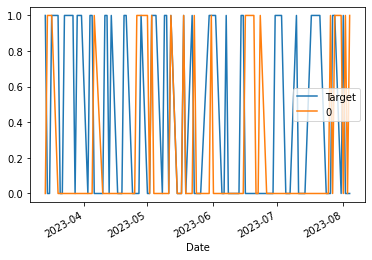

In [19]:
# Orange line (0) is predictions and blue line (Target) is what actually happened
combined.plot()

## Building A Backtesting System

In [20]:
# Build a more robust way to test algorithm; build a predict function to take train, test, predictors, and model
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
# backtest function takes in sp500 data, ML model, predictors, start value, and step value
# start and step values take the first 10 years of data and predict values for the 11th year, 
# then 11 years of data to predict values for 12th year, and so on
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    # Make predictions for all the years except the first 10 or so
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
# value_counts will count how many times each predictions was made
# Predicted market will go down in about 3900 days and predicted market will go up in about 2000 days
predictions["Predictions"].value_counts()

0    3933
1    2030
Name: Predictions, dtype: int64

In [24]:
# About 52% accurate on predicting whether market will go up
precision_score(predictions["Target"], predictions["Predictions"])

0.5197044334975369

In [25]:
# Market went up and down about 50% of days; half the times
predictions["Target"].value_counts() / predictions.shape[0]

1    0.505283
0    0.494717
Name: Target, dtype: float64

## Adding Additional Predictors To Our Model

In [26]:
horizons = [7,14,50,200,1000]
new_predictors = []

# Calculate mean for closing prices in the last 7, 14, 50, 200, 1000 trading days
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    # On a given day, it will look at the sum of target from the last few days
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [27]:
# When pandas cannot find enough days or enough rows prior to the current row to actually compute a rolling average, 
# it will just return NaN
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_7,Trend_7,Close_Ratio_14,Trend_14,Close_Ratio_50,Trend_50,Close_Ratio_200,Trend_200,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,4.088431,4.161439,4.070179,4.161439,4047587,4.243571,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,4.179689,4.252697,4.161437,4.243571,6326272,4.216193,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,4.225319,4.243571,4.143185,4.216193,3905957,4.088431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,4.179690,4.207068,4.088431,4.088431,4418682,4.115807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,4.070177,4.124933,4.061051,4.115807,3356669,4.051926,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,61.349998,62.320000,61.110001,62.189999,11700600,61.529999,0,0.987322,4.0,0.992658,7.0,0.974700,19.0,0.899492,93.0,1.021776,508.0
2023-08-01,62.320000,62.570000,61.180000,61.529999,9227600,61.750000,1,0.983873,3.0,0.982963,7.0,0.965442,19.0,0.890335,93.0,1.010604,507.0
2023-08-02,61.169998,62.330002,61.020000,61.750000,11937800,61.230000,0,0.994158,3.0,0.987075,8.0,0.969963,19.0,0.893990,93.0,1.013872,508.0


In [28]:
# Drop na rows
sp500 = sp500.dropna()

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_7,Trend_7,Close_Ratio_14,Trend_14,Close_Ratio_50,Trend_50,Close_Ratio_200,Trend_200,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,4.917783,4.959995,4.865016,4.875569,4627975,4.959994,1,0.982680,2.0,0.974243,4.0,0.979893,22.0,1.009064,91.0,0.928263,466.0
1993-12-15,4.886121,4.991653,4.875568,4.959994,5258375,4.949442,0,1.001827,2.0,0.992758,5.0,0.995931,22.0,1.026290,92.0,0.944208,466.0
1993-12-16,4.938889,4.959995,4.907229,4.949442,3063323,4.970545,1,1.002443,1.0,0.992293,5.0,0.992635,22.0,1.023710,92.0,0.942068,466.0
1993-12-17,4.949439,4.981098,4.928332,4.970545,5015040,4.959994,0,1.007948,2.0,0.998183,5.0,0.995813,22.0,1.027697,92.0,0.945926,467.0
1993-12-20,4.991653,5.033866,4.949441,4.959994,4560312,4.938887,0,1.005194,2.0,0.997423,5.0,0.992818,21.0,1.025248,91.0,0.943766,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,60.799999,61.500000,60.049999,61.410000,11593100,62.189999,1,0.971458,4.0,0.979537,7.0,0.961344,18.0,0.887842,93.0,1.009300,508.0
2023-07-31,61.349998,62.320000,61.110001,62.189999,11700600,61.529999,0,0.987322,4.0,0.992658,7.0,0.974700,19.0,0.899492,93.0,1.021776,508.0
2023-08-01,62.320000,62.570000,61.180000,61.529999,9227600,61.750000,1,0.983873,3.0,0.982963,7.0,0.965442,19.0,0.890335,93.0,1.010604,507.0


## Improving Our Model

In [30]:
# Improving model using RandomForestClassifier with 200 individual decision trees and min_samples_split at 50
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [31]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    # Returns probability that a row will be 0 or 1
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1 # Probability = 1 is predictions is greater than or equal to 60%
    preds[preds < .6] = 0 # Probability = 0 is predictions is less than 60%
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
predictions = backtest(sp500, model, new_predictors)

In [33]:
predictions["Predictions"].value_counts()

0.0    4682
1.0     280
Name: Predictions, dtype: int64

In [34]:
# Precision score improved slightly from 33% to 45%, which is still low
precision_score(predictions["Target"], predictions["Predictions"])

0.45